In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
data.shape

(12000, 15)

In [73]:
data.to_csv(f"./results/[K=2]rmse_data.csv")

In [64]:
data1 = pd.read_csv(f"./results/[K=2]rmse_data1.csv")
data2 = pd.read_csv(f"./results/[K=2]rmse_data2.csv")
data3 = pd.read_csv(f"./results/[K=2]rmse_data3.csv")
data4 = pd.read_csv(f"./results/[K=2]rmse_data4.csv")
data5 = pd.read_csv(f"./results/[K=2]rmse_data5.csv")
data6 = pd.read_csv(f"./results/[K=2]rmse_data6.csv")

data = pd.concat([data1, data2, data3, data4, data5, data6], axis=0) # 纵向
print(data.shape)
data.head()

(12000, 16)


,Unnamed: 0,seed,n,alpha,M,K,init_beta,init_sigma,os_beta,os_sigma,ts_beta,ts_sigma,ms_beta,ms_sigma,oracle_beta,oracle_sigma
0,0,0,1000,0.5,72,2,0.007711,0.268516,0.008746,0.138618,0.006640,0.138618,0.006690,0.138618,0.006497,0.113474
1,1,1,1000,0.5,72,2,0.005326,0.254088,0.007378,0.119179,0.005890,0.119179,0.005955,0.119179,0.005787,0.110339
2,2,2,1000,0.5,72,2,0.012687,0.288906,0.008460,0.153176,0.006881,0.153176,0.006915,0.153176,0.006909,0.124204
3,3,3,1000,0.5,72,2,0.005936,0.305830,0.009620,0.171890,0.006974,0.171890,0.007088,0.171890,0.006559,0.121366
4,4,4,1000,0.5,72,2,0.005560,0.263430,0.003951,0.134092,0.003996,0.134092,0.003989,0.134092,0.003917,0.110035


In [65]:
data = data.sort_values(by=['seed', 'n', 'alpha'])
data.shape

(12000, 16)

In [68]:
data = data.iloc[:, 1:]
data.head()

,seed,n,alpha,M,K,init_beta,init_sigma,os_beta,os_sigma,ts_beta,ts_sigma,ms_beta,ms_sigma,oracle_beta,oracle_sigma
0,0,1000,0.25,72,2,0.017026,0.431802,0.013664,0.230435,0.007224,0.230435,0.007396,0.230435,0.007358,0.155330
0,0,1000,0.50,72,2,0.007711,0.268516,0.008746,0.138618,0.006640,0.138618,0.006690,0.138618,0.006497,0.113474
250,0,1000,0.75,72,2,0.005135,0.189890,0.005283,0.093462,0.005071,0.093462,0.005073,0.093462,0.004667,0.085317
500,0,1000,1.00,72,2,0.004057,0.182898,0.004348,0.085251,0.003809,0.085251,0.003813,0.085251,0.003648,0.058738
500,0,2500,0.25,159,2,0.003611,0.217985,0.004190,0.111874,0.003008,0.111874,0.003025,0.111874,0.002874,0.098846


In [67]:
RMSE = data.loc[:, ["n", "alpha", "M", "K", "seed",
                    "init_beta", "os_beta", "ts_beta", "ms_beta", "oracle_beta",
                    "init_sigma", "os_sigma", "oracle_sigma",
                   ]]
RMSE.groupby(['K', 'n', 'alpha']).mean()

M   seed  init_beta   os_beta   ts_beta   ms_beta  \
K n    alpha                                                          
2 1000 0.25    72.0  499.5   0.011591  0.014180  0.008763  0.008974   
       0.50    72.0  499.5   0.007955  0.006699  0.006171  0.006183   
       0.75    72.0  499.5   0.006433  0.005211  0.004988  0.004991   
       1.00    72.0  499.5   0.005611  0.004459  0.004343  0.004344   
  2500 0.25   159.0  499.5   0.004897  0.004067  0.003692  0.003699   
       0.50   159.0  499.5   0.003403  0.002658  0.002572  0.002572   
       0.75   159.0  499.5   0.002757  0.002151  0.002103  0.002103   
       1.00   159.0  499.5   0.002354  0.001844  0.001808  0.001808   
  5000 0.25   293.0  499.5   0.002539  0.001996  0.001877  0.001877   
       0.50   293.0  499.5   0.001761  0.001349  0.001313  0.001313   
       0.75   293.0  499.5   0.001460  0.001113  0.001089  0.001089   
       1.00   293.0  499.5   0.001248  0.000943  0.000931  0.000931   

              oracle_beta  init_sigma  os_sigma  oracle_sigma  
K n    alpha                                                   
2 1000 0.25      0.008604    0.469786  0.273185      0.162187  
       0.50      0.006106    0.277318  0.143022      0.113734  
       0.75      0.004950    0.203180  0.104756      0.092664  
       1.00      0.004317    0.163596  0.086463      0.079838  
  2500 0.25      0.003631    0.235628  0.120795      0.102469  
       0.50      0.002551    0.139540  0.075869      0.071997  
       0.75      0.002099    0.103965  0.060348      0.058843  
       1.00      0.001803    0.084920  0.051561      0.050794  
  5000 0.25      0.001862    0.139286  0.075555      0.071864  
       0.50      0.001312    0.085138  0.051667      0.050810  
       0.75      0.001089    0.064969  0.041895      0.041556  
       1.00      0.000928    0.053794  0.036115      0.035926

In [61]:
a = data.loc[(data['K'] == 2) & (data['n'] == 5000) & (data['alpha'] == 1.0)]

In [62]:
a.columns

Index(['Unnamed: 0', 'seed', 'n', 'alpha', 'M', 'K', 'init_beta', 'init_sigma',
       'os_beta', 'os_sigma', 'ts_beta', 'ts_sigma', 'ms_beta', 'ms_sigma',
       'oracle_beta', 'oracle_sigma'],
      dtype='object')

In [63]:
print(a.shape)

(1000, 16)


In [51]:
def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

In [52]:
print(f"Init beta:   {np.mean(a.init_beta):6f}")
print(f"OS beta:     {np.mean(a.os_beta):6f}")
print(f"TS beta:     {np.mean(a.ts_beta):6f}")
print(f"MS beta:     {np.mean(a.ms_beta):6f}")
print(f"Oracle beta: {np.mean(a.oracle_beta):6f}")

Init beta:   0.001250
OS beta:     0.000944
TS beta:     0.000933
MS beta:     0.000933
Oracle beta: 0.000929


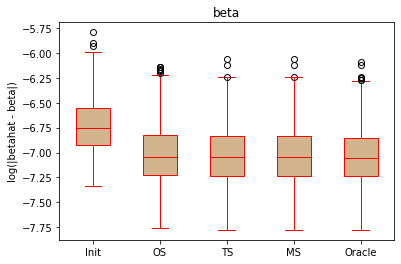

In [53]:
data1 = np.log(np.array(a.init_beta))
data2 = np.log(np.array(a.os_beta))
data3 = np.log(np.array(a.ts_beta))
data4 = np.log(np.array(a.ms_beta))
data5 = np.log(np.array(a.oracle_beta))
beta_data = [data1, data2, data3, data4, data5]

fig, ax = plt.subplots()
bp1 = box_plot(beta_data, 'red', 'tan')
# ax.legend([bp1["boxes"][0]], ['Raw'])
# ax.set_ylim(0, 10)
plt.ylabel("log(|betahat - beta|)")
plt.title("beta")
plt.xticks(range(1, len(beta_data)+1), labels=["Init", "OS", "TS", "MS", "Oracle"], rotation=0)
plt.show()

In [54]:
data1 = np.log(np.array(a.init_sigma))
data2 = np.log(np.array(a.os_sigma))
data3 = np.log(np.array(a.ts_sigma))
data4 = np.log(np.array(a.ms_sigma))
data5 = np.log(np.array(a.oracle_sigma))

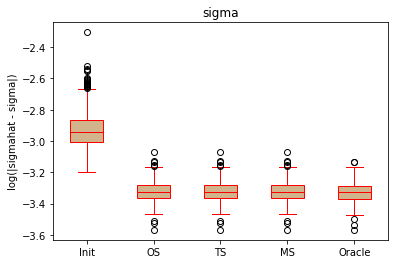

In [55]:
sigma_data = [data1, data2, data3, data4, data5]

fig, ax = plt.subplots()
bp1 = box_plot(sigma_data, 'red', 'tan')
# ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Raw', 'Rescale'])
# ax.set_ylim(0, 10)
plt.ylabel("log(|sigmahat - sigma|)")
plt.title("sigma")
plt.xticks(range(1, len(sigma_data)+1), labels=["Init", "OS", "TS", "MS", "Oracle"], rotation=0)
plt.show()

In [56]:
print(f"Init   sigma: {np.mean(a.init_sigma):6f}")
print(f"OS     sigma: {np.mean(a.os_sigma):6f}")
print(f"TS     sigma: {np.mean(a.ts_sigma):6f}")
print(f"MS     sigma: {np.mean(a.ms_sigma):6f}")
print(f"Oracle sigma: {np.mean(a.oracle_sigma):6f}")

Init   sigma: 0.053801
OS     sigma: 0.036115
TS     sigma: 0.036115
MS     sigma: 0.036115
Oracle sigma: 0.035924
